# Networkx tutorial

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Section 1. Pokemon data로 알아보는 Networkx 시각화

간단하게, 포켓몬 데이터를 바탕으로 Networkx를 통해 어떤 시각화를 할 수 있을지에 대해 알아보자.

In [2]:
data = pd.read_csv('./Pokemon.csv')
data.head(5)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


data의 구성부터 파악하면 다음과 같다.
- Name : 포켓몬 이름
- Type : 타입이 복수 타입인 경우가 있다. 단일 타입의 경우 NaN인 것으로 보인다.
- total : HP~Speed 능력치의 총 합이다.
  - 그 이후 체력, 공격, 방어, 특공, 특방, 스피드의 합이 나타나있다.
- Gen : 몇세대인지를 나타낸다.
- Legendary : 전설 포켓몬 여부

본격적 분석 전에, data의 결측치를 없애고 진행하고자 한다.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


type 2에 결측치가 있다. 이를 공백으로 채우자.

In [4]:
data = data.fillna(' ')

In [5]:
data

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


또한 지금 보면 도감 번호로는 721마리나, 실제 데이터가 800마리가 들어와있는데 이에 대한 이유는
- 폼 체인지
- 메기진화  

등의 영향이 있어 이들의 개체값이나 타입이 바뀌는 경우가 존재한다.  따라서 도감번호가 겹친다고 데이터를 날릴수는 없고, 오히려 유의미한 데이터이므로 같이 분석을 해야 할 것이다.
추가적인 다양한 분석이 가능하겠지만, 오늘은 군집 시각화를 하는 방법만 확인한다.

### 주타입에 따른 그래프 그리기

pandas data frame을 바탕으로 바로 쉽게 그래프를 그릴 수 있다.
일단 networknx에서는 그래프 객체를 만들어 저장한 뒤, 해당 객체를 plot시키는 방법으로 그릴 수 있다.

In [6]:
g = nx.Graph()
g = nx.nx.from_pandas_edgelist(data, source = 'Name', target = 'Type 1')
print(nx.info(g))

Name: 
Type: Graph
Number of nodes: 818
Number of edges: 800
Average degree:   1.9560


node는 818개인데, edge가 800개인 이유는 다음일 것이다.
현재 기준으로, 포켓몬의 속성은 18개이고, 그 메인 속성에 해당하는 그래프를 그렸으리라 추정할 수 있다.

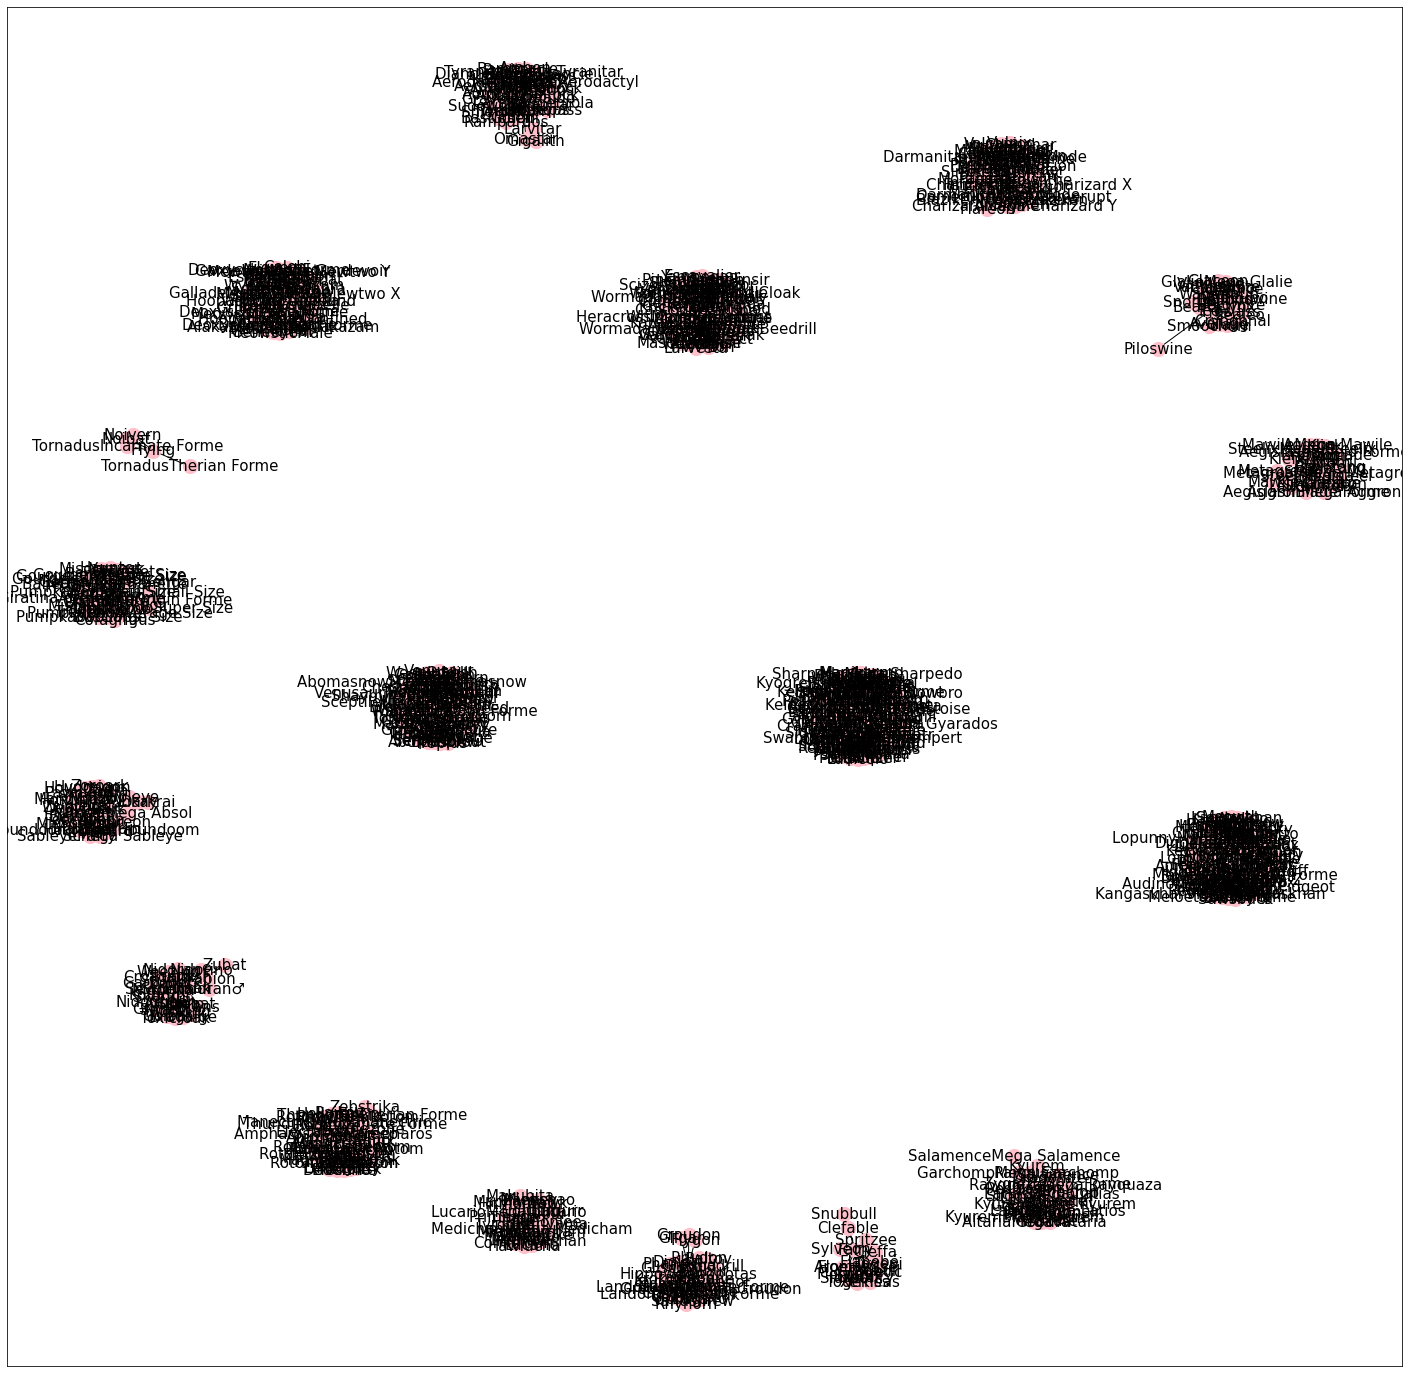

In [7]:
plt.figure(figsize = (25, 25))
nx.draw_networkx(g, node_size=200, node_color='pink', font_size=15)
plt.show()

## Section 2. 밑바닥부터 그려보기

간단한 데이터셋을 통해 그려보는 방법을 알았으므로, 이번에는 밑바닥부터 그래프를 그려보자.

In [8]:
g1 = nx.Graph()

In [9]:
g1.add_node(1)
g1.add_node(2)
g1.add_node(3)
g1.add_node(4)

g1.add_edge(1, 3)
g1.add_edge(2, 4)
g1.add_edge(2, 3)
g1.add_edge(1, 4)

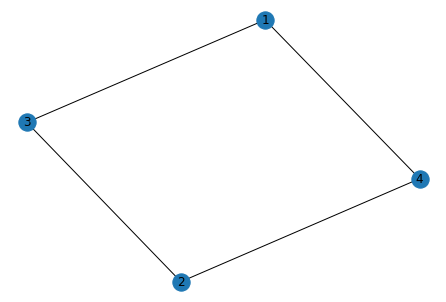

In [10]:
nx.draw(g1, with_labels = True)

여기서 edge를 지울 수도 있다.

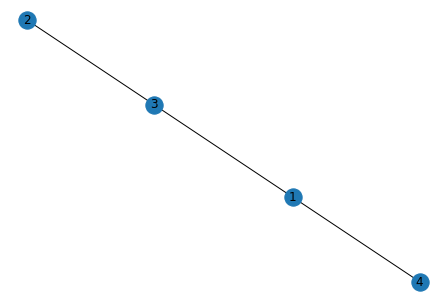

In [11]:
g1.remove_edge(2, 4)
nx.draw(g1, with_labels = True)

경우에 따라서는 Node의 중요도가 달라져 그 weight를 다르게 그리고 싶을 것이다. 이를 위한 방법을 보자.

In [12]:
# 차수 차이를 위해 add_edge
g1.add_edge(3, 4)

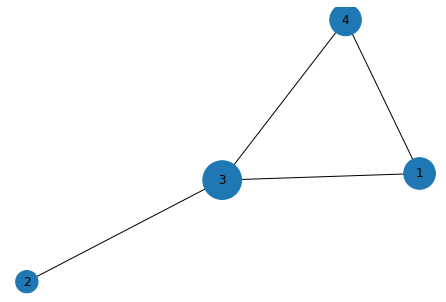

In [13]:

#차수에 따른 node size 설정
d = dict(g1.degree)
nx.draw(g1, 
        nodelist = d.keys(), 
        node_size = [v * 500 for v in d.values()], 
        with_labels = True)

잘 보면, 1, 4는 차수가 2이고, 3은 차수가 3, 2는 차수가 1이다.
차수가 작은 노드는 작은 원, 차수가 큰 원은 크게 설정되어 있다.

### 그래프 구조 파악하기

In [14]:
g1.degree

DegreeView({1: 2, 2: 1, 3: 3, 4: 2})

In [15]:
g1.number_of_nodes()

4

In [16]:
g1.number_of_edges()

4

### 방향 그래프 그리기

그래프의 방향성이 중요한 경우도 존재한다.
이 때는 digraph로 객체를 만들게 된다.

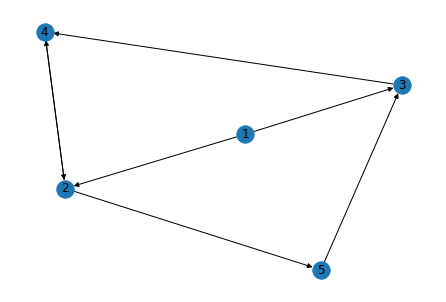

In [17]:
g2 = nx.DiGraph()

# 이렇게 간단하게 할 수 있다.
g2.add_edges_from([(1, 2), (1, 3), (2, 4), (3, 4), (4, 2), (5, 3), (2, 5)])

nx.draw(g2, with_labels = True)

In [18]:
g2.degree

DiDegreeView({1: 2, 2: 4, 3: 3, 4: 3, 5: 2})

In [19]:
# 해당 노드로  들어오는 edge 개수
g2.in_degree

InDegreeView({1: 0, 2: 2, 3: 2, 4: 2, 5: 1})

In [20]:
# 해당 노드에서 나가는 edge 개수
g2.out_degree

OutDegreeView({1: 2, 2: 2, 3: 1, 4: 1, 5: 1})

이와 같은 방법을 통해 그래프를 시각화 할 수 있게 된다.

## Section 3. networkx 조금 더 써보기

조금 더 필요한 기능을 알아보고자 한다.

먼저 그래프를 행렬 형태로 표현하는 방법을 보고자 한다.
인접 행렬을 얻어낸다면, 인접행렬의 연산을 통해 그래프의 특성 및 경로등을 판단하는데 유용하다.

In [21]:
g1.add_edge(1, 5)
g1.add_edge(5, 6)
g1.add_edge(2, 6)
g1.add_edge(5, 3)
g1.add_edge(3, 4)

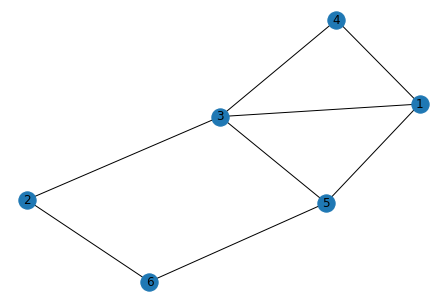

In [22]:
nx.draw(g1,
        with_labels = True)

다음과 같은 그래프를 가지고 작업을 진행하자. 

In [23]:
nx.to_numpy_matrix(g1)

matrix([[0., 0., 1., 1., 1., 0.],
        [0., 0., 1., 0., 0., 1.],
        [1., 1., 0., 1., 1., 0.],
        [1., 0., 1., 0., 0., 0.],
        [1., 0., 1., 0., 0., 1.],
        [0., 1., 0., 0., 1., 0.]])

각 성분별로 연결관계를 주게 된다.

네트워크의 중심성 또한 계산할 수 있다.

In [24]:
nx.betweenness_centrality(g1)

{1: 0.08333333333333333,
 2: 0.08333333333333333,
 3: 0.3666666666666667,
 4: 0.0,
 5: 0.21666666666666667,
 6: 0.05}

In [25]:
nx.closeness_centrality(g1)

{1: 0.7142857142857143,
 2: 0.625,
 3: 0.8333333333333334,
 4: 0.5555555555555556,
 5: 0.7142857142857143,
 6: 0.5555555555555556}

In [26]:
nx.degree_centrality(g1)

{1: 0.6000000000000001, 2: 0.4, 3: 0.8, 4: 0.4, 5: 0.6000000000000001, 6: 0.4}